# EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable # si nos da un error este comando es por no tenerlo instalado
#!pip install holidays
import holidays
from datetime import date, datetime

pd.options.display.max_columns=None
# establecer el tamaño de nuestras figuras
plt.rcParams["figure.figsize"] = (10,8)

In [3]:
df = pd.read_csv('data/bikes_limpio.csv', index_col = 0)

# 1. Outliers

Empezamos con un boxplot para ver outliers

In [4]:
numericas = df.select_dtypes(include = np.number)

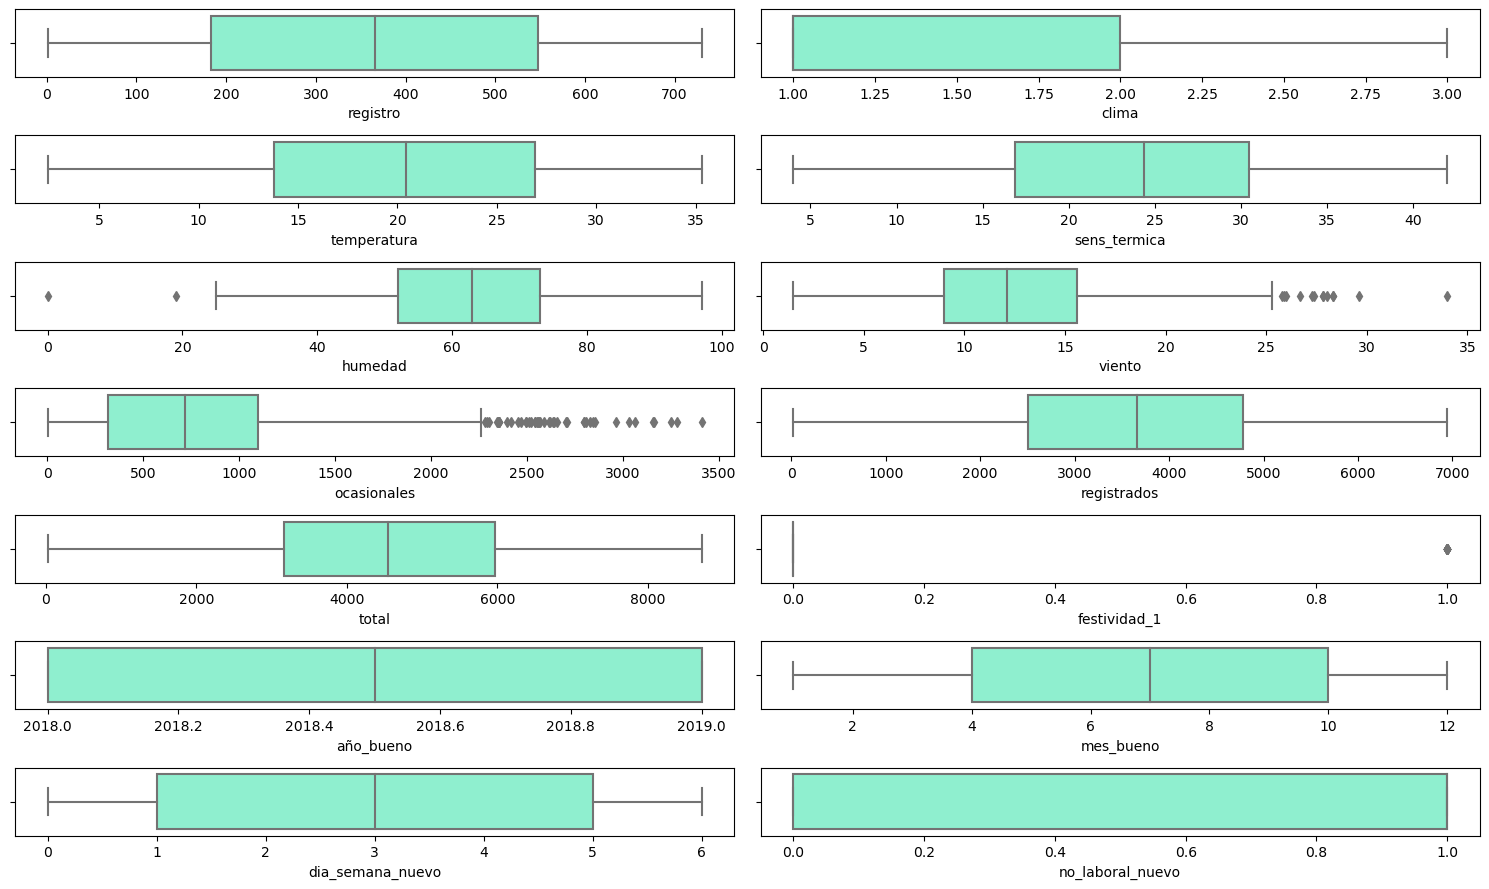

In [5]:
fig, axes = plt.subplots(7,2, figsize=(15,9))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); 

    
plt.tight_layout()
plt.show()

Vemos que hay muchos outlayers en 'ocasionales', vamos a ver si guardan relación con otra variable

In [6]:

def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    ##tenemos el diccionario de indices de las filas que tienen outliers, pero lo ideal seria que extraer los dataframes para cargas y trabaar con ese dataframe.
    ##dicc_dataframes={}

    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        ##aqui creo una key que va a ser diferente por cada columna y cuyo value sea el dataframe que acao de crear. Keys seran los nombres de als coumnas y value los dataframes.
        ##dicc_dataframes[col]=outliers_data
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices #, dicc_dataframes

In [7]:
lista_columnas = ['ocasionales']

In [8]:
outlayers_col = detectar_outliers(lista_columnas, df)

In [9]:
outlayers_col

{'ocasionales': [148,
  183,
  184,
  196,
  246,
  281,
  440,
  446,
  454,
  455,
  461,
  468,
  469,
  475,
  489,
  496,
  503,
  504,
  510,
  511,
  512,
  517,
  518,
  524,
  531,
  532,
  538,
  539,
  549,
  559,
  567,
  580,
  594,
  608,
  609,
  616,
  622,
  629,
  630,
  636,
  643,
  657,
  664,
  679]}

In [10]:
indices = outlayers_col['ocasionales']


In [11]:
df_outlayers = df.iloc[indices]
df_outlayers

,registro,clima,temperatura,sens_termica,humedad,viento,ocasionales,registrados,total,fecha_nueva,festividad,festividad_1,año_bueno,estacion_correcta,mes_bueno,dia_semana_nuevo,no_laboral_nuevo
148,149,1,27.4,30.8,82.0,14.3,2355,2433,4788,2018-05-29,NaN,0,2018,primavera,5,1,1
183,184,2,29.4,33.4,68.0,15.3,2282,2367,4649,2018-07-03,NaN,0,2018,verano,7,1,1
184,185,2,29.8,33.3,64.0,5.5,3065,2978,6043,2018-07-04,Independence Day,1,2018,verano,7,2,0
196,197,1,28.2,31.9,58.0,14.0,2418,3505,5923,2018-07-16,NaN,0,2018,verano,7,0,1
246,247,1,29.1,33.3,74.0,13.8,2521,2419,4940,2018-09-04,NaN,0,2018,verano,9,1,1
281,282,1,22.2,26.2,73.0,4.3,2397,3114,5511,2018-10-09,NaN,0,2018,otoño,10,1,1
440,441,2,21.1,25.3,76.0,7.4,3155,4681,7836,2019-03-17,NaN,0,2019,invierno,3,6,0
446,447,2,24.7,28.5,69.0,7.8,2469,5893,8362,2019-03-23,NaN,0,2019,primavera,3,5,0
454,455,2,17.4,21.1,74.0,16.8,2301,3934,6235,2019-03-31,NaN,0,2019,primavera,3,6,0
455,456,2,17.5,20.9,68.0,11.5,2347,3694,6041,2019-04-01,NaN,0,2019,primavera,4,0,1


Parece que los outlaiers ocasionales son en días cálidos (temperatura), en los meses primavera-verano y mayoritariamente domingo-lunes. 

### Gestión outliers humedad/viento

La variable humedad, al tener tan pocos oulayers y con pinta de error, lo sustituiremos por la mediana. Con la variable viento ocurre lo mismo. Lo sustituimos por la media.

In [12]:
lista_columnas = ['viento', 'humedad']

In [13]:
ind_viento_humedad = detectar_outliers(lista_columnas, df)

In [14]:
ind_viento_humedad

{'viento': [44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720],
 'humedad': [49, 68]}

In [15]:
df['humedad'].mean()

62.76849315068493

In [16]:
df['humedad'].median()

63.0

In [18]:
df['viento'].mean()

12.764794520547941

In [17]:
df['viento'].median()

12.1

In [75]:
for k, v in ind_viento_humedad.items():
    media = df[k].mean() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df.loc[i,k] = media # usando el loc, reemmplazamos los valores de los outliers por la media que hemos calculado al inicio

# 2. Vemos correlaciones entre variables

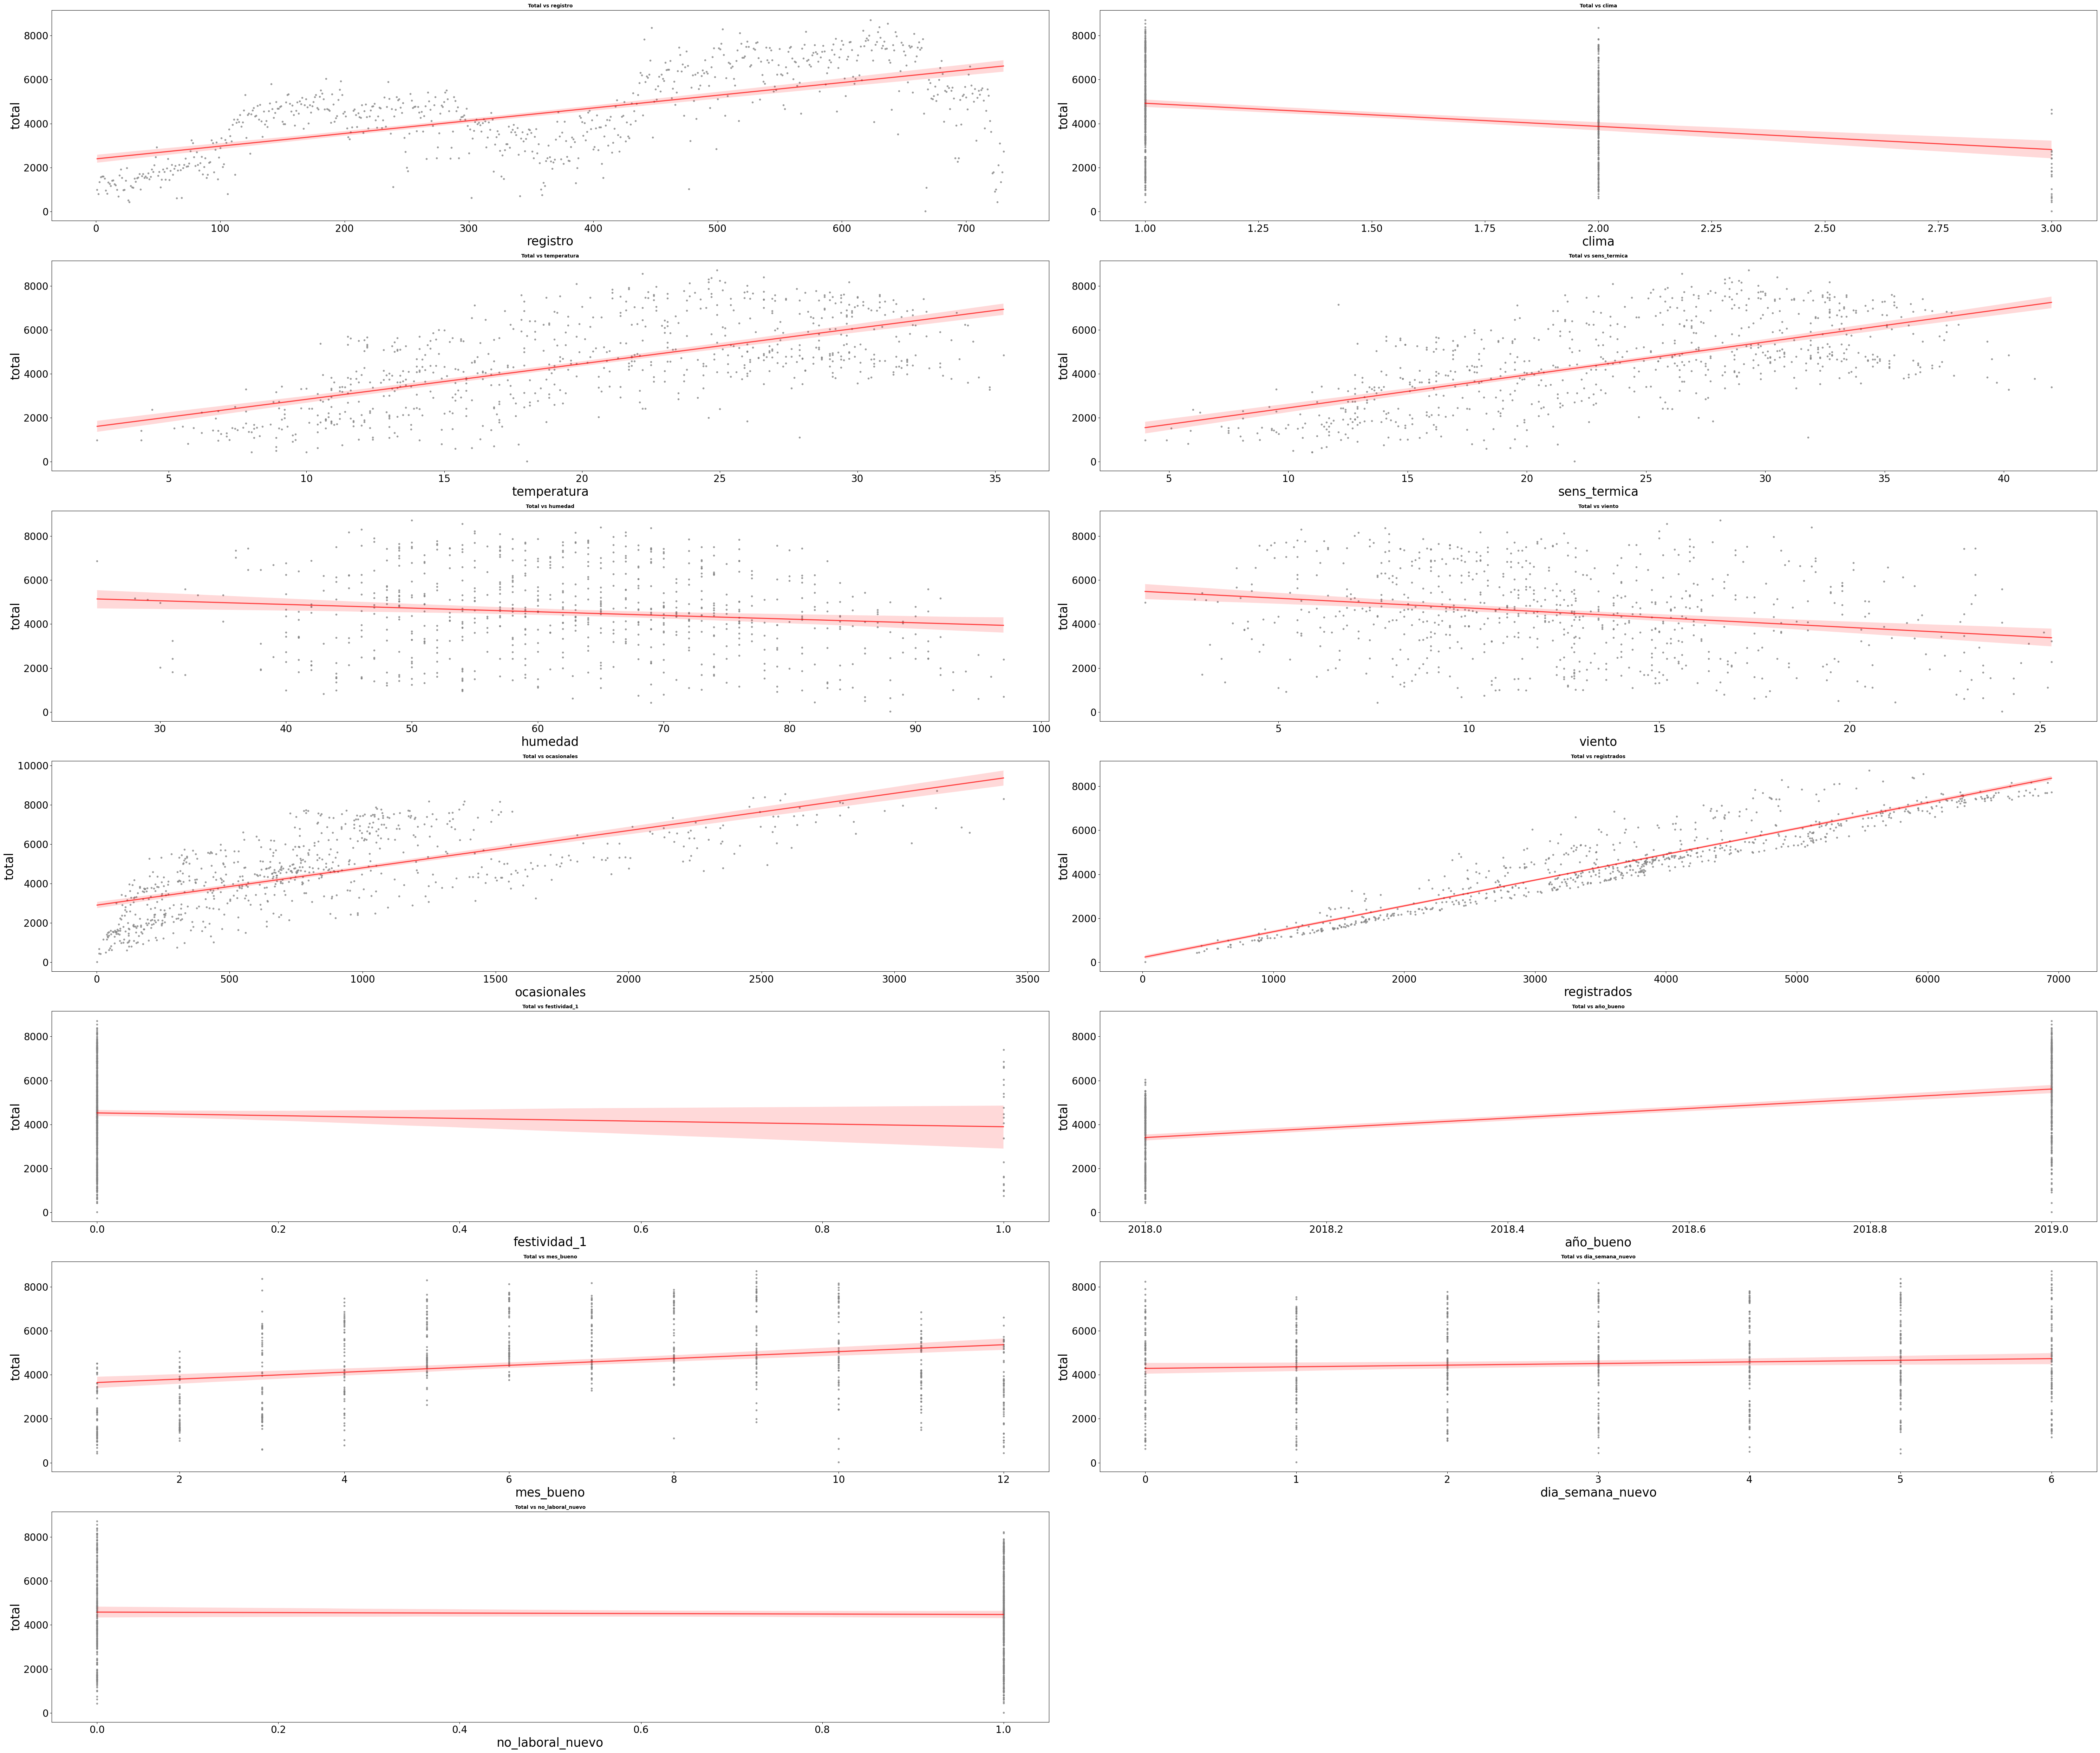

In [87]:
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (60, 50))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("total")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["total"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.7}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Total vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel(colum, fontsize = 25)
    axes[i].set_ylabel( "total", fontsize = 25)
    
fig.tight_layout()
fig.delaxes(axes[-1]);

/tmp/ipykernel_54579/3248638306.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


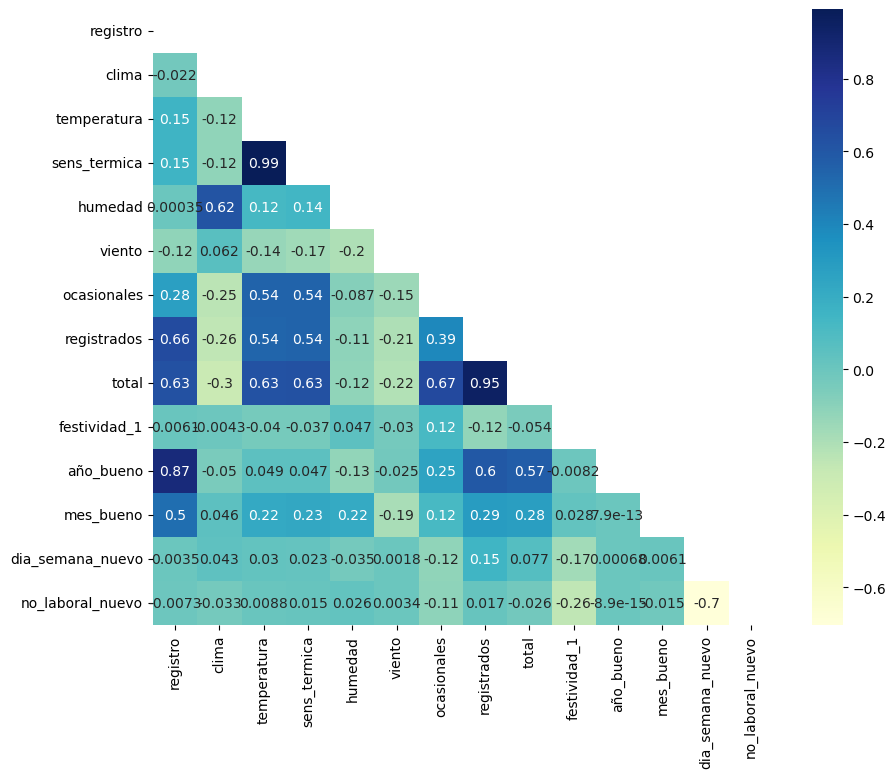

In [88]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

sns.heatmap(df.corr(), # calculamos la correlación. En este caso, como no estamos especificando nada la correlación será la de Pearson.
            cmap = "YlGnBu", # para especoficar el color del mapa
           annot = True, 
           mask = mask); # para sacar el valor de la correlación

Obviamente sobre los totales influyen registrados/ocasionales. Decidimos que para  que  nos salgan resultados más precisos, lo mejor es dividir el  DF entre estas dos variables, que pasaran a ser nuestras variables respuestas en su respectivo conjunto de datos.

Parece que la temperatura y la sensación térmica también influyen en el número de bicis alquiladas.

# 3. Division DataFrame

Dividimos directamente por ocasionales/registrados para sacar conclusiones de ambas variables (que serán nuestra variable respuesta)

In [78]:
df_registrados = df.drop(['ocasionales', 'total'], axis = 1)

In [79]:
df_ocasionales = df.drop(['registrados', 'total'], axis = 1)

In [81]:
df_registrados.to_csv('data/bikes_registrados.csv')
df_ocasionales.to_csv('data/bikes_ocasionales.csv')